In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr

In [6]:
sr = nc.Dataset('Antarctica_5km_withshelves_v0.75.nc')
sr

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Comments: Antarctica master data set (with ice shelves)
    Conventions: CF-1.3
    History: Created at the University of Montana (2009)
    Title: Antarctica
    dimensions(sizes): sealeveltimes(406), temptimes(4051), time(1), y1(1200), x1(1200)
    variables(dimensions): float32 sealeveltimes(sealeveltimes), float32 usrf(time, y1, x1), float32 topg(time, y1, x1), float32 temptimes(temptimes), float32 presprcp(time, y1, x1), float32 lon(time, y1, x1), |S1 mapping(), float32 melt(time, y1, x1), float32 sealevel_time_series(sealeveltimes), float32 surfvelmag(time, y1, x1), float32 lat(time, y1, x1), float32 thk(time, y1, x1), float32 balvelmag(time, y1, x1), float32 bheatflx_shapiro(time, y1, x1), float32 time(time), float32 y1(y1), int32 thkmask(time, y1, x1), float32 temp_time_series(temptimes), float32 x1(x1), float32 bheatflx_fox(time, y1, x1), float32 presartm(time, y1, x1), float32

In [8]:
sr['y1']

<class 'netCDF4._netCDF4.Variable'>
float32 y1(y1)
    long_name: Cartesian y-coordinate
    standard_name: projection_y_coordinate
    units: meters
unlimited dimensions: 
current shape = (1200,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
import matplotlib.pyplot as plt

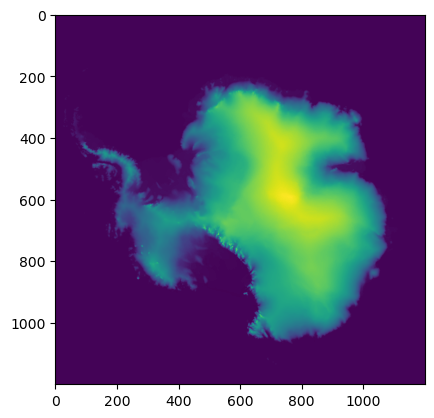

In [43]:

sr_y = np.array(sr['y1'])
sr_x = np.array(sr['x1'])


usrf = np.array(sr['usrf'])
usrf = usrf[0]
sr_y = np.flipud(sr_y)
usrf = np.flipud(usrf)

plt.imshow(usrf)

In [48]:
sr_xr = xr.open_dataset("Antarctica_5km_withshelves_v0.75.nc", decode_times=False)
sr_xr

<xarray.Dataset>
Dimensions:               (sealeveltimes: 406, time: 1, y1: 1200, x1: 1200, temptimes: 4051)
Coordinates:
  * sealeveltimes         (sealeveltimes) float32 0.0 1e+03 ... 4.05e+05
  * temptimes             (temptimes) float32 0.0 100.0 ... 4.049e+05 4.05e+05
  * time                  (time) float32 0.0
  * y1                    (y1) float32 -2.8e+06 -2.795e+06 ... 3.195e+06
  * x1                    (x1) float32 -2.8e+06 -2.795e+06 ... 3.195e+06
Data variables: (12/18)
    usrf                  (time, y1, x1) float32 ...
    topg                  (time, y1, x1) float32 ...
    presprcp              (time, y1, x1) float32 ...
    lon                   (time, y1, x1) float32 ...
    mapping               |S1 ...
    melt                  (time, y1, x1) float32 ...
    ...                    ...
    thkmask               (time, y1, x1) int32 ...
    temp_time_series      (temptimes) float32 ...
    bheatflx_fox          (time, y1, x1) float32 ...
    presartm              (time, y1, x1) float32 ...
    surfvelx              (time, y1, x1) float32 ...
    surfvely              (time, y1, x1) float32 ...
Attributes:
    Comments:     Antarctica master data set (with ice shelves)
    Conventions:  CF-1.3
    History:      Created at the University of Montana (2009)
    Title:        Antarctica

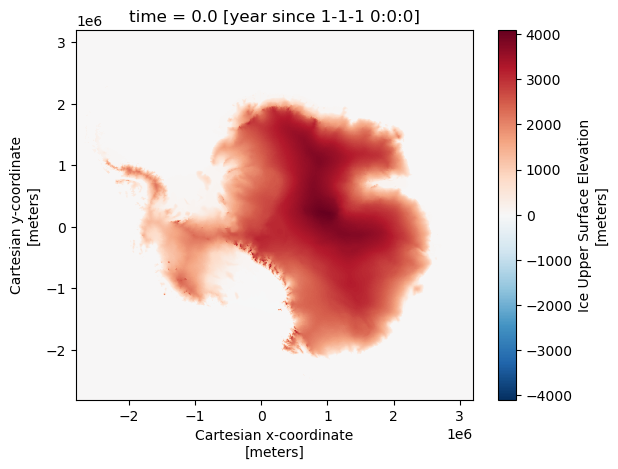

In [73]:
#plt.imshow(np.flipud(sr_xr.usrf[0]))
sr_xr.usrf[0].plot()

usrf_xr = sr_xr.usrf

In [74]:
my_spot = usrf_xr.sel(y1=-2800000,x1=-2800000)
my_spot

<xarray.DataArray 'usrf' (time: 1)>
array([0.], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
    y1       float32 -2.8e+06
    x1       float32 -2.8e+06
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

In [77]:
my_spot2 = usrf_xr.isel(y1=600, x1=600)
my_spot2

<xarray.DataArray 'usrf' (time: 1)>
array([2990.1367], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
    y1       float32 2e+05
    x1       float32 2e+05
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

<xarray.DataArray 'sealevel_time_series' (sealeveltimes: 406)>
array([ 0.     ,  0.     , -0.73143, ..., -7.41879, -5.85144, -5.29416],
      dtype=float32)
Coordinates:
  * sealeveltimes  (sealeveltimes) float32 0.0 1e+03 2e+03 ... 4.04e+05 4.05e+05
Attributes:
    Source:         Imbrie, John D., A. McIntyre (2006), SPECMAP time scale d...
    long_name:      Sea Level (variation from present)
    units:          meters
    standard_name:  global_average_sea_level_change

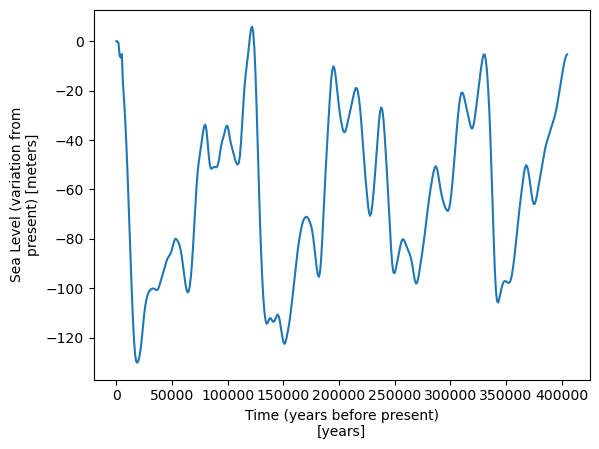

In [84]:
sea_level = sr_xr['sealevel_time_series']
sea_level.plot()
sea_level

In [87]:
import scipy.signal

sr_xr.time

<xarray.DataArray 'time' (time: 1)>
array([0.], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
Attributes:
    calender:       none
    long_name:      Time
    standard_name:  time
    units:          year since 1-1-1 0:0:0

In [99]:
(f, S) = scipy.signal.periodogram(sea_level, 1/1000, scaling='density')

/tmp/ipykernel_246/2806716253.py:1: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/f


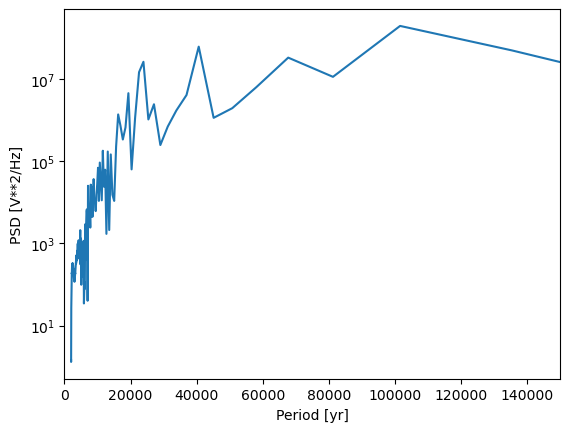

In [104]:
T = 1/f

plt.semilogy(T, S)
#plt.ylim([1e-7, 1e2])
plt.xlim([0,150000])
plt.xlabel('Period [yr]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

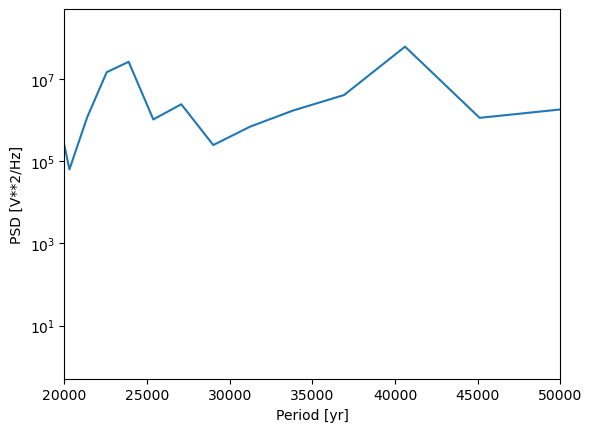

In [106]:
plt.semilogy(T, S)
#plt.ylim([1e-7, 1e2])
plt.xlim([20000,50000])
plt.xlabel('Period [yr]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()